# Glovo Fintech Assessment

# Table of Contents [](#table-of-contents)

A.a.[Customer Delivery Time](#a)

A.b.[Delivery Distance](#b)
   
A.c.[Reassignment Probability](#c)
   
B. [Trends on reassignments](#B)

C. [Waiting Time at Pickup](#C)

D. [Improving Waiting Time at Pickup](#D)

### Read the data

In [1]:
import pandas as pd
import numpy as np
import black
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "~/Documents/Git/Fintech-Payments/data_sample.xlsx"
df = pd.read_excel(path, sheet_name="Data sample city N weekly order")

### Data Exploration and Preprocessing

In [3]:
df.head()

,id,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,Count,Total Time
0,53134335,DeliveredStatus,85260.0,18579597,20153483,WALL - Partner,True,BICYCLE,1,6.029,2019-07-13 13:04:44,2019-07-13 13:05:32,2019-07-13 13:06:49,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,NaN,55
1,53009545,DeliveredStatus,23517.0,11871195,20153483,WALL - Partner,True,BICYCLE,1,3.998,2019-07-12 20:06:29,2019-07-12 20:10:42,2019-07-12 20:11:02,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,NaN,36
2,53129297,DeliveredStatus,18300.0,1053786,20153483,WALL - Partner,True,BICYCLE,1,5.309,2019-07-13 12:14:58,2019-07-13 12:15:44,2019-07-13 12:23:40,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,NaN,44
3,53235752,CanceledStatus,85260.0,20466508,20153483,WALL - Partner,True,BICYCLE,1,6.429,2019-07-13 21:55:58,2019-07-13 22:24:58,2019-07-13 22:24:58,NaT,NaT,NaT,2019-07-13 22:25:15,NaN,29
4,53002671,DeliveredStatus,15912.0,16549489,20153483,WALL - Partner,True,BICYCLE,1,3.442,2019-07-12 19:40:13,2019-07-12 19:41:14,2019-07-12 19:42:34,2019-07-12 19:46:28,2019-07-12 19:56:59,2019-07-12 20:07:08,2019-07-12 20:10:37,NaN,30


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2471.0,5.289264e+07,3.454010e+05,5.225996e+07,5.261935e+07,52862774.00,5.320484e+07,5.347565e+07
store_address_id,2440.0,2.927117e+04,2.187078e+04,1.572700e+04,1.830000e+04,18300.00,3.064000e+04,9.097100e+04
customer_id,2471.0,1.226381e+07,6.560418e+06,9.442500e+04,5.659130e+06,13735060.00,1.813984e+07,2.062533e+07
courier_id,2471.0,1.391151e+07,4.934578e+06,2.044461e+06,9.558769e+06,14924108.00,1.778752e+07,2.055075e+07
number_of_assignments,2471.0,1.172805e+00,4.808951e-01,1.000000e+00,1.000000e+00,1.00,1.000000e+00,6.000000e+00
total_real_distance,2471.0,5.045905e+00,2.478414e+00,7.080000e-01,3.342000e+00,4.56,6.132000e+00,1.978900e+01
Count,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Time,2471.0,3.070943e+01,1.312946e+01,0.000000e+00,2.200000e+01,31.00,4.000000e+01,5.900000e+01


In [5]:
df.describe(include=["O"])  # include the categorical variables

,final_status,vertical,transport
count,2471,2471,2471
unique,2,4,3
top,DeliveredStatus,WALL - Partner,BICYCLE
freq,2389,2411,1255


In [6]:
df.dtypes

id                                                   int64
final_status                                        object
store_address_id                                   float64
customer_id                                          int64
courier_id                                           int64
vertical                                            object
is_food                                               bool
transport                                           object
number_of_assignments                                int64
total_real_distance                                float64
activation_time_local                       datetime64[ns]
last_courier_assigned_time                  datetime64[ns]
courier_started_order_local                 datetime64[ns]
courier_enters_pickup_time_local            datetime64[ns]
pickup_time_local                           datetime64[ns]
courier_enters_delivery_point_time_local    datetime64[ns]
termination_time                            datetime64[n

In [7]:
df.set_index("id", inplace=True)
df.head()

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,Count,Total Time
id,,,,,,,,,,,,,,,,,,
53134335,DeliveredStatus,85260.0,18579597,20153483,WALL - Partner,True,BICYCLE,1,6.029,2019-07-13 13:04:44,2019-07-13 13:05:32,2019-07-13 13:06:49,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,NaN,55
53009545,DeliveredStatus,23517.0,11871195,20153483,WALL - Partner,True,BICYCLE,1,3.998,2019-07-12 20:06:29,2019-07-12 20:10:42,2019-07-12 20:11:02,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,NaN,36
53129297,DeliveredStatus,18300.0,1053786,20153483,WALL - Partner,True,BICYCLE,1,5.309,2019-07-13 12:14:58,2019-07-13 12:15:44,2019-07-13 12:23:40,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,NaN,44
53235752,CanceledStatus,85260.0,20466508,20153483,WALL - Partner,True,BICYCLE,1,6.429,2019-07-13 21:55:58,2019-07-13 22:24:58,2019-07-13 22:24:58,NaT,NaT,NaT,2019-07-13 22:25:15,NaN,29
53002671,DeliveredStatus,15912.0,16549489,20153483,WALL - Partner,True,BICYCLE,1,3.442,2019-07-12 19:40:13,2019-07-12 19:41:14,2019-07-12 19:42:34,2019-07-12 19:46:28,2019-07-12 19:56:59,2019-07-12 20:07:08,2019-07-12 20:10:37,NaN,30


In [8]:
df.isna().sum()

final_status                                   0
store_address_id                              31
customer_id                                    0
courier_id                                     0
vertical                                       0
is_food                                        0
transport                                      0
number_of_assignments                          0
total_real_distance                            0
activation_time_local                          0
last_courier_assigned_time                     0
courier_started_order_local                    0
courier_enters_pickup_time_local              61
pickup_time_local                             61
courier_enters_delivery_point_time_local      67
termination_time                               0
Count                                       2471
Total Time                                     0
dtype: int64

Drop Count feature as it only contains NaNs

In [9]:
df.drop(columns="Count", inplace=True)

In [10]:
df[df.courier_enters_pickup_time_local.isna()].final_status.value_counts(dropna=False)

CanceledStatus    61
Name: final_status, dtype: int64

In [11]:
df[df.pickup_time_local.isna()].final_status.value_counts(dropna=False)

CanceledStatus    61
Name: final_status, dtype: int64

In [12]:
df[df.courier_enters_delivery_point_time_local.isna()].final_status.value_counts(
    dropna=False
)

CanceledStatus    67
Name: final_status, dtype: int64

All the NaN instances of the above features occur when an order is cancelled, which is expected.

In [13]:
df[df.store_address_id.isna()].vertical.value_counts(dropna=False)

QUIERO     30
COURIER     1
Name: vertical, dtype: int64

All the instances from store_address_id being NaN derive from QUIERO order. These type of orders do not have a store associated with it, therefore the NaNs are expected. However, in order to transform the store_address_id column into a integer column I will replace the NaNs by 0.

In [15]:
# Replace NaNs with 0
df["store_address_id"].fillna(0, inplace=True)

# Transform the store_address_id into a integer
df["store_address_id"] = df["store_address_id"].astype(int)

In [16]:
df.isna().mean()

final_status                                0.000000
store_address_id                            0.000000
customer_id                                 0.000000
courier_id                                  0.000000
vertical                                    0.000000
is_food                                     0.000000
transport                                   0.000000
number_of_assignments                       0.000000
total_real_distance                         0.000000
activation_time_local                       0.000000
last_courier_assigned_time                  0.000000
courier_started_order_local                 0.000000
courier_enters_pickup_time_local            0.024686
pickup_time_local                           0.024686
courier_enters_delivery_point_time_local    0.027115
termination_time                            0.000000
Total Time                                  0.000000
dtype: float64

In [17]:
df.vertical.value_counts()

WALL - Partner       2411
QUIERO                 30
WALL - NonPartner      29
COURIER                 1
Name: vertical, dtype: int64

In vertical there should only be 3 types of label. I assume that 'COURIER' is the same as 'QUIERO'.

In [18]:
df.loc[df.vertical == "COURIER", "vertical"] = "QUIERO"

### A.a Customer Delivery Time. How long the customer waited for the order <a id="a"></a>

Let's assume that the time that the customer waited for their order was the time elapsed between the moment he ordered and the moment the order was delivered

In [19]:
df.final_status.value_counts(dropna=False)

DeliveredStatus    2389
CanceledStatus       82
Name: final_status, dtype: int64

In [20]:
df_delivered = df[df.final_status == "DeliveredStatus"]

In [21]:
df_delivered["Waiting_Time"] = (
    df_delivered.termination_time - df_delivered.activation_time_local
)

/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_98124/1641602823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered["Waiting_Time"] = (


In [22]:
df_delivered.groupby("transport")["Waiting_Time"].mean()

transport
BICYCLE     0 days 00:37:12.304312449
CAR         0 days 00:41:18.310945273
MOTORBIKE   0 days 00:36:49.726912928
Name: Waiting_Time, dtype: timedelta64[ns]

In [23]:
df_delivered["hours"] = df_delivered["Waiting_Time"].dt.components["hours"]
df_delivered["minutes"] = df_delivered["Waiting_Time"].dt.components["minutes"]
df_delivered["seconds"] = df_delivered["Waiting_Time"].dt.components["seconds"]

df_delivered["Waiting_Time"] = pd.to_datetime(
    df_delivered[["hours", "minutes", "seconds"]].astype(str).agg(":".join, axis=1),
    format="%H:%M:%S",
)
df_delivered.drop(columns=["hours", "minutes", "seconds"], inplace=True)
df_delivered.head()

/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_98124/557748456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered["hours"] = df_delivered["Waiting_Time"].dt.components["hours"]
/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_98124/557748456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered["minutes"] = df_delivered["Waiting_Time"].dt.components["minutes"]
/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_98124/557748456.py:3: SettingWithCopyWarnin

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,Total Time,Waiting_Time
id,,,,,,,,,,,,,,,,,,
53134335,DeliveredStatus,85260,18579597,20153483,WALL - Partner,True,BICYCLE,1,6.029,2019-07-13 13:04:44,2019-07-13 13:05:32,2019-07-13 13:06:49,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,55,1900-01-01 00:55:05
53009545,DeliveredStatus,23517,11871195,20153483,WALL - Partner,True,BICYCLE,1,3.998,2019-07-12 20:06:29,2019-07-12 20:10:42,2019-07-12 20:11:02,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,36,1900-01-01 00:36:32
53129297,DeliveredStatus,18300,1053786,20153483,WALL - Partner,True,BICYCLE,1,5.309,2019-07-13 12:14:58,2019-07-13 12:15:44,2019-07-13 12:23:40,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,44,1900-01-01 00:44:25
53002671,DeliveredStatus,15912,16549489,20153483,WALL - Partner,True,BICYCLE,1,3.442,2019-07-12 19:40:13,2019-07-12 19:41:14,2019-07-12 19:42:34,2019-07-12 19:46:28,2019-07-12 19:56:59,2019-07-12 20:07:08,2019-07-12 20:10:37,30,1900-01-01 00:30:24
53210586,DeliveredStatus,23518,16210716,20153483,WALL - Partner,True,BICYCLE,1,3.103,2019-07-13 20:34:10,2019-07-13 20:35:04,2019-07-13 20:36:19,2019-07-13 20:45:05,2019-07-13 20:49:33,2019-07-13 21:06:04,2019-07-13 21:08:21,34,1900-01-01 00:34:11


In [24]:
print(df_delivered.groupby("transport")["Waiting_Time"].mean())
print("=====================================")
print(df_delivered.groupby("vertical")["Waiting_Time"].mean())
print("=====================================")
print(df_delivered.groupby("is_food")["Waiting_Time"].mean())
print("=====================================")

transport
BICYCLE     1900-01-01 00:37:12.304312320
CAR         1900-01-01 00:41:18.310945280
MOTORBIKE   1900-01-01 00:36:49.726913024
Name: Waiting_Time, dtype: datetime64[ns]
vertical
QUIERO              1900-01-01 00:36:33.800000000
WALL - NonPartner   1900-01-01 00:42:32.347826176
WALL - Partner      1900-01-01 00:37:44.354646272
Name: Waiting_Time, dtype: datetime64[ns]
is_food
False   1900-01-01 00:35:47.044775936
True    1900-01-01 00:37:49.984496128
Name: Waiting_Time, dtype: datetime64[ns]


In [25]:
df_delivered.groupby(["transport", "vertical", "is_food"])[
    "Waiting_Time"
].mean().to_frame()

Waiting_Time
transport vertical          is_food                              
BICYCLE   QUIERO            False   1900-01-01 00:38:14.999999744
          WALL - NonPartner False   1900-01-01 00:35:58.249999872
                            True    1900-01-01 00:42:12.285714432
          WALL - Partner    False   1900-01-01 00:31:28.894736640
                            True    1900-01-01 00:37:15.797478912
CAR       QUIERO            False   1900-01-01 00:53:12.000000000
                            True    1900-01-01 00:33:43.000000000
          WALL - NonPartner False   1900-01-01 00:57:15.666666752
          WALL - Partner    False   1900-01-01 00:42:14.249999872
                            True    1900-01-01 00:41:09.776081408
MOTORBIKE QUIERO            False   1900-01-01 00:29:09.375000064
                            True    1900-01-01 01:06:51.000000000
          WALL - NonPartner False   1900-01-01 00:49:20.500000000
                            True    1900-01-01 00:33:59.200000000
          WALL - Partner    False   1900-01-01 00:32:26.800000000
                            True    1900-01-01 00:36:54.795862016

In [26]:
print("Average Waiting Time of all orders: ", df_delivered.Waiting_Time.mean())

Average Waiting Time of all orders:  1900-01-01 00:37:46.536625920


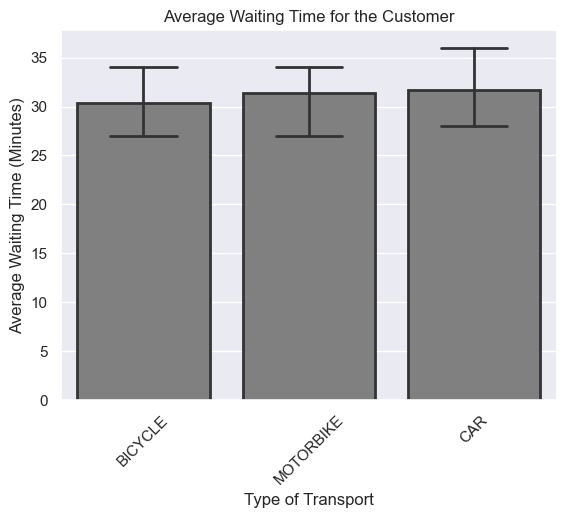

In [87]:
sns.barplot(
    x="transport",
    y="Total Time",
    data=df_delivered,
    color="grey",
    estimator="mean",
    saturation=0.3,
    errorbar=("pi", 20),
    capsize=0.4,
    errcolor=".2",
    linewidth=2,
    errwidth=2,
    edgecolor=".2",
)
plt.title("Average Waiting Time for the Customer")
plt.xlabel("Type of Transport")
plt.ylabel("Average Waiting Time (Minutes)")
plt.xticks(rotation=45)
plt.show()

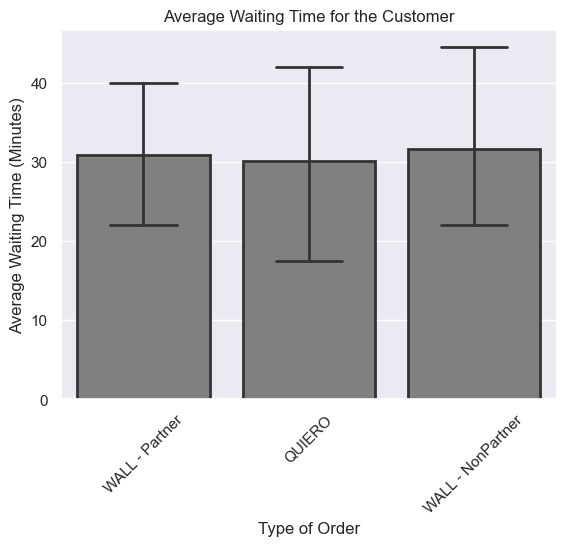

In [83]:
sns.barplot(
    x="vertical",
    y="Total Time",
    data=df_delivered,
    color="grey",
    estimator="mean",
    saturation=0.3,
    errorbar=("pi", 50),
    capsize=0.4,
    errcolor=".2",
    linewidth=2,
    errwidth=2,
    edgecolor=".2",
)
plt.title("Average Waiting Time for the Customer")
plt.xlabel("Type of Order")
plt.ylabel("Average Waiting Time (Minutes)")
plt.xticks(rotation=45)
plt.show()

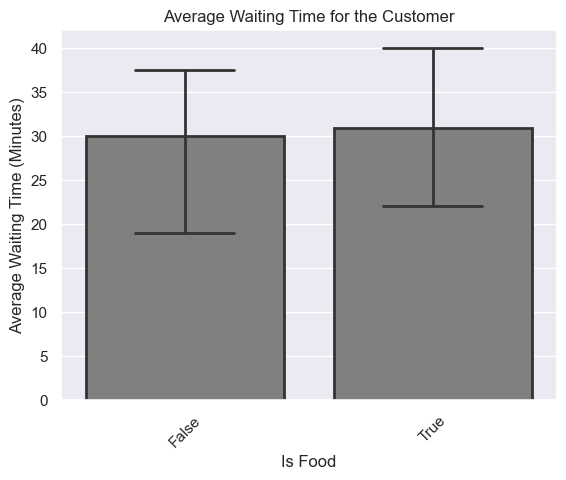

In [84]:
sns.barplot(
    x="is_food",
    y="Total Time",
    data=df_delivered,
    color="grey",
    estimator="mean",
    saturation=0.3,
    errorbar=("pi", 50),
    capsize=0.4,
    errcolor=".2",
    linewidth=2,
    errwidth=2,
    edgecolor=".2",
)
plt.title("Average Waiting Time for the Customer")
plt.xlabel("Is Food")
plt.ylabel("Average Waiting Time (Minutes)")
plt.xticks(rotation=45)
plt.show()

### A.b Delivery Distance. Total distance traveled by the couriers <a id="b"></a>

In [27]:
print(
    "Total amount of km traveled by couriers: ", df.total_real_distance.sum().round(2)
)

Total amount of km traveled by couriers:  12468.43


In [28]:
df.groupby(["transport"])["total_real_distance"].sum().round(2).to_frame()

,total_real_distance
transport,
BICYCLE,5210.62
CAR,2626.43
MOTORBIKE,4631.38


### A.c Reassignment Probability (whenever we need to assign an order to another courier after the first assignment it counts as a reassignment) <a id="c"></a>

In [29]:
df.number_of_assignments.value_counts(dropna=False)

1    2129
2     274
3      56
4       9
6       2
5       1
Name: number_of_assignments, dtype: int64

In [30]:
print(
    "Probability of reassignment: ",
    (len(df[df.number_of_assignments > 1]) / len(df)) * 100,
)

Probability of reassignment:  13.840550384459732


### B. Regarding reassignments can you see any trends / correlation between this metric and any of the dimensions in the dataset? <a id="B"></a>

In [31]:
df.corr()["number_of_assignments"]

/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_98124/2509568041.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["number_of_assignments"]


store_address_id         0.097358
customer_id             -0.016838
courier_id               0.000910
is_food                 -0.024531
number_of_assignments    1.000000
total_real_distance      0.089987
Total Time               0.021101
Name: number_of_assignments, dtype: float64

Encoding categorical variables in order to extract correlation metrics with the number_of_assignments

In [32]:
df.dtypes

final_status                                        object
store_address_id                                     int64
customer_id                                          int64
courier_id                                           int64
vertical                                            object
is_food                                               bool
transport                                           object
number_of_assignments                                int64
total_real_distance                                float64
activation_time_local                       datetime64[ns]
last_courier_assigned_time                  datetime64[ns]
courier_started_order_local                 datetime64[ns]
courier_enters_pickup_time_local            datetime64[ns]
pickup_time_local                           datetime64[ns]
courier_enters_delivery_point_time_local    datetime64[ns]
termination_time                            datetime64[ns]
Total Time                                           int

In [33]:
df["reassigned"] = 0
df.loc[df.number_of_assignments > 1, "reassigned"] = 1

In [34]:
categorical_columns = ["final_status", "vertical", "is_food", "transport"]

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded

,store_address_id,customer_id,courier_id,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,Total Time,reassigned,final_status_DeliveredStatus,vertical_WALL - NonPartner,vertical_WALL - Partner,is_food_True,transport_CAR,transport_MOTORBIKE
id,,,,,,,,,,,,,,,,,,,,
53134335,85260,18579597,20153483,1,6.029,2019-07-13 13:04:44,2019-07-13 13:05:32,2019-07-13 13:06:49,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,55,0,1,0,1,1,0,0
53009545,23517,11871195,20153483,1,3.998,2019-07-12 20:06:29,2019-07-12 20:10:42,2019-07-12 20:11:02,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,36,0,1,0,1,1,0,0
53129297,18300,1053786,20153483,1,5.309,2019-07-13 12:14:58,2019-07-13 12:15:44,2019-07-13 12:23:40,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,44,0,1,0,1,1,0,0
53235752,85260,20466508,20153483,1,6.429,2019-07-13 21:55:58,2019-07-13 22:24:58,2019-07-13 22:24:58,NaT,NaT,NaT,2019-07-13 22:25:15,29,0,0,0,1,1,0,0
53002671,15912,16549489,20153483,1,3.442,2019-07-12 19:40:13,2019-07-12 19:41:14,2019-07-12 19:42:34,2019-07-12 19:46:28,2019-07-12 19:56:59,2019-07-12 20:07:08,2019-07-12 20:10:37,30,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52684871,88704,15546013,16298640,1,3.948,2019-07-10 20:33:35,2019-07-10 21:14:10,2019-07-10 21:18:50,NaT,NaT,NaT,2019-07-10 22:01:08,27,0,0,0,1,1,0,0
52527417,85260,14227823,16298640,1,3.795,2019-07-09 20:26:49,2019-07-09 20:37:28,2019-07-09 20:39:11,2019-07-09 20:42:21,2019-07-09 20:48:09,2019-07-09 20:57:38,2019-07-09 21:00:52,34,0,1,0,1,1,0,0
52876432,15910,13101274,16298640,1,2.963,2019-07-11 22:37:14,2019-07-11 22:38:05,2019-07-11 22:39:04,2019-07-11 22:37:29,2019-07-11 22:58:53,2019-07-11 23:03:58,2019-07-11 23:08:44,31,0,1,0,1,1,0,0


In [35]:
df_encoded.corr()["number_of_assignments"]

/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_98124/2831721395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_encoded.corr()["number_of_assignments"]


store_address_id                0.097358
customer_id                    -0.016838
courier_id                      0.000910
number_of_assignments           1.000000
total_real_distance             0.089987
Total Time                      0.021101
reassigned                      0.896742
final_status_DeliveredStatus   -0.111982
vertical_WALL - NonPartner      0.023358
vertical_WALL - Partner        -0.036265
is_food_True                   -0.024531
transport_CAR                   0.051181
transport_MOTORBIKE            -0.005470
Name: number_of_assignments, dtype: float64

In [36]:
df_encoded.corr()["reassigned"]

/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_98124/757802551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_encoded.corr()["reassigned"]


store_address_id                0.097598
customer_id                    -0.017201
courier_id                     -0.010988
number_of_assignments           0.896742
total_real_distance             0.081339
Total Time                      0.040476
reassigned                      1.000000
final_status_DeliveredStatus   -0.082770
vertical_WALL - NonPartner      0.043377
vertical_WALL - Partner        -0.043365
is_food_True                   -0.033666
transport_CAR                   0.044972
transport_MOTORBIKE             0.000614
Name: reassigned, dtype: float64

/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_98124/4280942181.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_encoded.corr(method="pearson")


<Axes: >

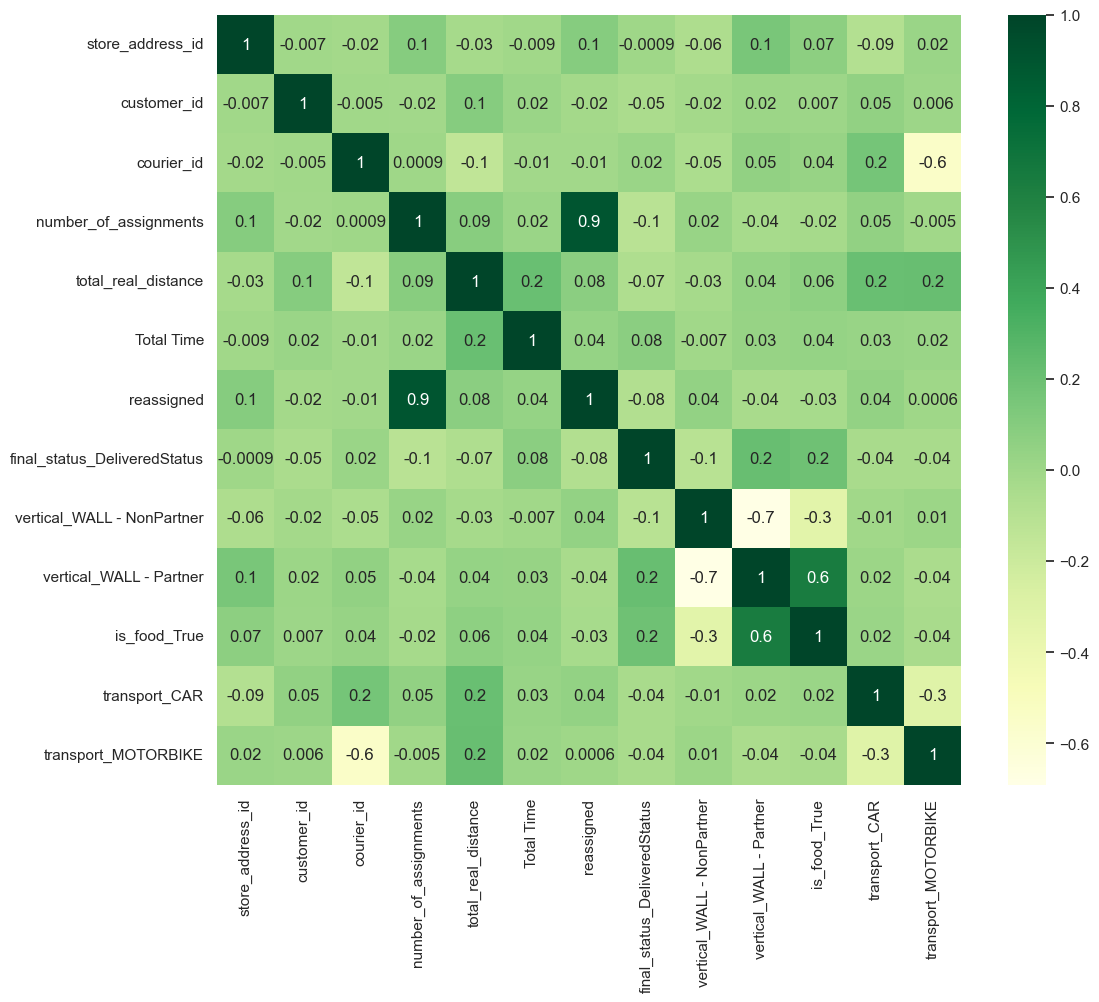

In [37]:
sns.set(font_scale=1)
df_corr = df_encoded.corr(method="pearson")
figure = plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, cmap="YlGn", annot=True, fmt=".1g")

#### Final Status vs Reassigned

In [38]:
# Create a contingency table
contingency_table = pd.crosstab(df["reassigned"], df["final_status"])

# Calculate Cramér's V
chi2, _, _, _ = chi2_contingency(contingency_table)
n = df.shape[0]
V = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {V}")

Cramér's V: 0.0794986765799978


In [39]:
df[["final_status", "reassigned"]].value_counts().to_frame().sort_index()

0
final_status    reassigned      
CanceledStatus  0             58
                1             24
DeliveredStatus 0           2071
                1            318

The percentage of reassigned orders is higher in orders that have been canceled (30%), when compared with orders that have been delivered (13.3%). However both the Pearson correlation coeficient and Cramer's V show that the correlation between both variables is very low, being close to 0 (0.08).

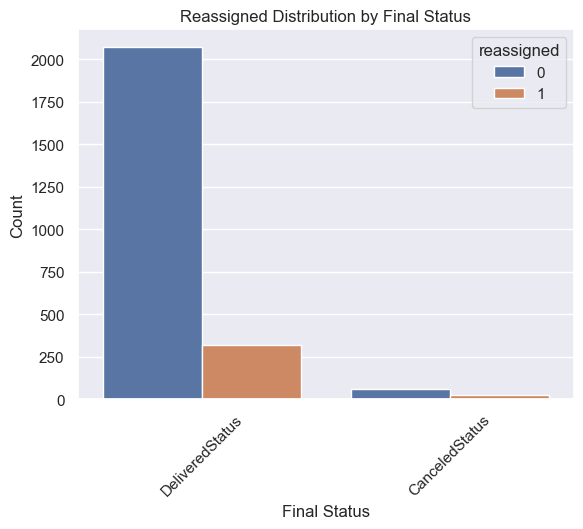

In [40]:
sns.countplot(data=df, x="final_status", hue="reassigned")
plt.title("Reassigned Distribution by Final Status")
plt.xlabel("Final Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Reassigned vs Total Distance per Order

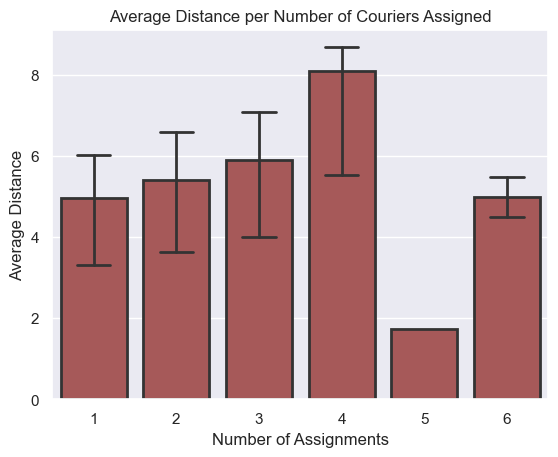

In [41]:
sns.barplot(
    x="number_of_assignments",
    y="total_real_distance",
    data=df_encoded,
    color="red",
    estimator="mean",
    saturation=0.3,
    errorbar=("pi", 50),
    capsize=0.4,
    errcolor=".2",
    linewidth=2,
    errwidth=2,
    edgecolor=".2",
)
plt.title("Average Distance per Number of Couriers Assigned")
plt.xlabel("Number of Assignments")
plt.ylabel("Average Distance")
plt.show()

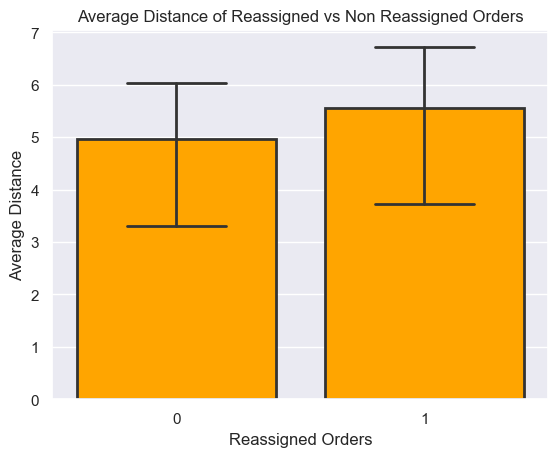

In [42]:
sns.barplot(
    x="reassigned",
    y="total_real_distance",
    data=df_encoded,
    color="orange",
    estimator="mean",
    saturation=1.5,
    errorbar=("pi", 50),
    capsize=0.4,
    errcolor=".2",
    linewidth=2,
    errwidth=2,
    edgecolor=".2",
)
plt.title("Average Distance of Reassigned vs Non Reassigned Orders")
plt.xlabel("Reassigned Orders")
plt.ylabel("Average Distance")
plt.show()

According to this plot we can see that until the 4th courier assignment there is a positive correlation between the distance and the number of couriers assigned to an order. Meaning that as total distance increases, so does the number of couriers being assigned.

This might indicate that when the delivery is further than 5km, couriers tend to refuse such order and other courier has to be assigned to the job.

#### Reassigned vs Store_ID

Let's check if any of the stores in our dataset might have any influence in an order being reassigned to another courier. In order to do so I will take the median of the occurences of the stores in the dataset and only consider the stores that have appeared more than that median (all the others will be bundled into 'Other').

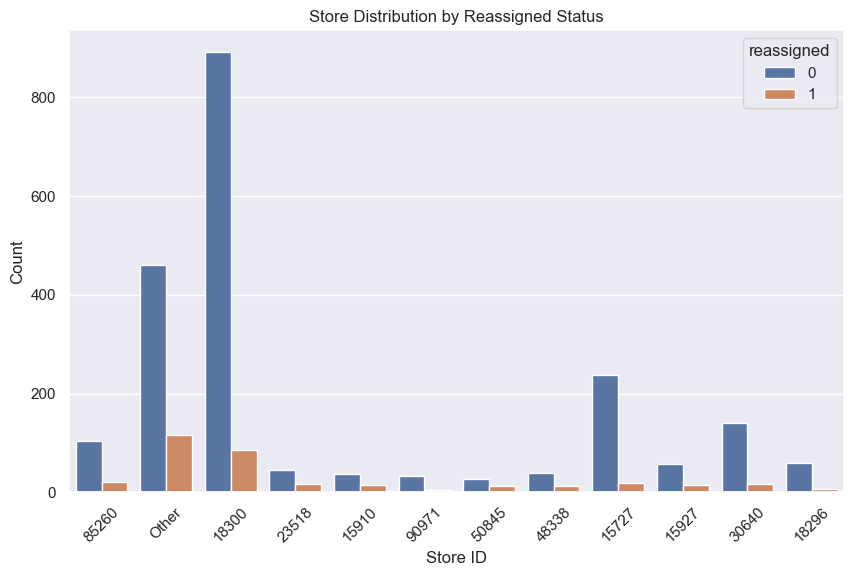

In [43]:
# Count the number of instances of each store ID
store_counts = df.store_address_id.value_counts()

# Create a list of store IDs that appear more than the median of occurences
stores_to_keep = store_counts[
    store_counts > df.store_address_id.value_counts().mean()
].index

# Group stores with fewer than the median cases into 'Other'
df["store_address_id_grouped"] = df["store_address_id"].apply(
    lambda x: x if x in stores_to_keep else "Other"
)

# create visualization for each category of country and hue of Reassigned

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="store_address_id_grouped", hue="reassigned")
plt.title("Store Distribution by Reassigned Status")
plt.xlabel("Store ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

It does not appear that store ID has any correlation with the probability of an order being reassigned.

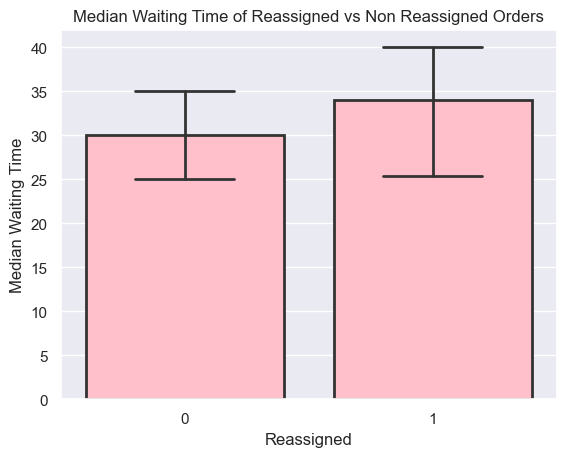

In [44]:
sns.barplot(
    x="reassigned",
    y="Total Time",
    data=df,
    color="pink",
    estimator="median",
    saturation=1,
    errorbar=("pi", 30),
    capsize=0.4,
    errcolor=".2",
    linewidth=2,
    errwidth=2,
    edgecolor=".2",
)
plt.title("Median Waiting Time of Reassigned vs Non Reassigned Orders")
plt.xlabel("Reassigned")
plt.ylabel("Median Waiting Time")
plt.show()

The Pearson's correlation coeficient between total waiting and reassigned orders is low (0.04), however we can observe that the median waiting time for customers is higher when a order gets reassigned.

### C. Once the courier arrives at the store, the time until the order is picked-up (waiting_time_at_pickup), can present high variation. With the data given, present an analysis showcasing this. Can you identify any clear trends in terms of worst offenders? What could be the possible causes when the courier is waiting for a very long time before picking up the order? <a id="C"></a>

Pickup Time - Courier Enters Pickup

Range of Waiting Time:  0 days 01:29:04
Standard Deviation of Waiting Time:  0 days 00:12:47.908542153
Interquartile Range of Waiting Time:  0 days 00:11:39
Median of Waiting Time:  0 days 00:11:41
Average of Waiting Time:  0 days 00:15:14.658921161
Skewness of Waiting Time:  2.0486170558858112


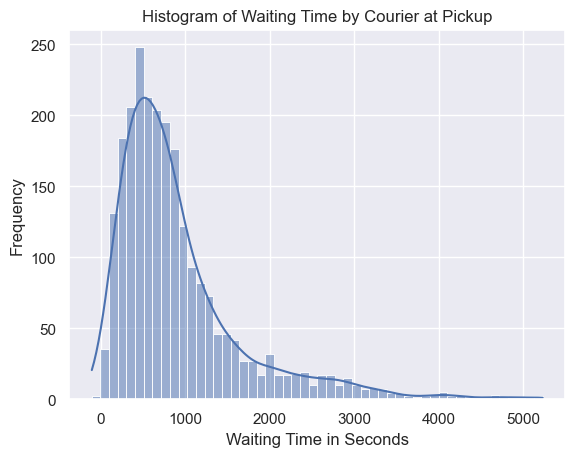

In [45]:
# Create a new variable that computes the time elapsed from the moment a courier enters the pickup point and he actually pick ups the order
df["waiting_time_at_pickup"] = (
    df.pickup_time_local - df.courier_enters_pickup_time_local
)

# Compute the range of the waiting time feature
range_waiting_time = df.waiting_time_at_pickup.max() - df.waiting_time_at_pickup.min()

# Compute the standard deviation
std_waiting_time = df.waiting_time_at_pickup.std()

# Compute the IQR
quartile_1 = df.waiting_time_at_pickup.quantile(0.25)
quartile_3 = df.waiting_time_at_pickup.quantile(0.75)
iqr = quartile_3 - quartile_1

print("Range of Waiting Time: ", range_waiting_time)
print("Standard Deviation of Waiting Time: ", std_waiting_time)
print("Interquartile Range of Waiting Time: ", iqr)
print("Median of Waiting Time: ", df.waiting_time_at_pickup.median())
print("Average of Waiting Time: ", df.waiting_time_at_pickup.mean())

df["waiting_time_seconds"] = df.waiting_time_at_pickup.dt.total_seconds()
print("Skewness of Waiting Time: ", df.waiting_time_seconds.skew())

sns.histplot(df.waiting_time_seconds, kde=True)
plt.xlabel("Waiting Time in Seconds")
plt.ylabel("Frequency")
plt.title("Histogram of Waiting Time by Courier at Pickup")
plt.show()

As shown by both the histogram and the skewness metric, the waiting time (measured in seconds) is right-skewed or positively skewed, meaning that the majority of waiting time by the courier at pickup is somewhat low, however there are few instances that are outliers and represent longer waiting times by the courier. 

In the next cells I will try to find some possible causes and patterns that might cause longer waiting times.

In [46]:
print("Number of unique stores: ", len(df.store_address_id.unique()))
print("Number of unique couriers: ", len(df.courier_id.unique()))

Number of unique stores:  68
Number of unique couriers:  83


#### Waiting Time at Pickup vs Store_ID

Let's investigate if there are any worst offenders

First let's check the stores that have the highest average waiting time at pickup amongst the stores that have a number of orders higher than the average order amount per store of the dataset:

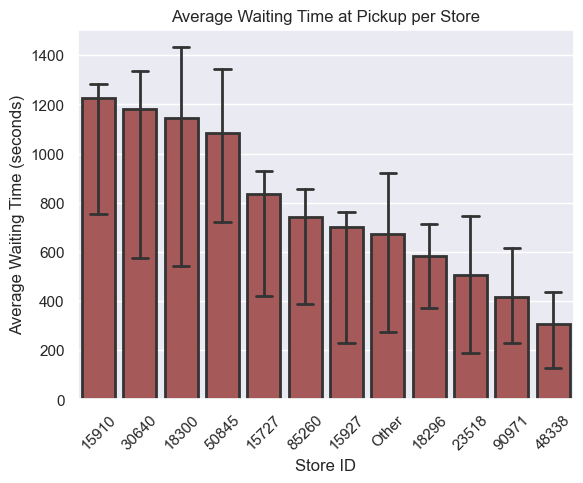

In [47]:
# Count the number of instances of each store ID
store_counts = df.store_address_id.value_counts()

# Create a list of store IDs that appear more than the mean of occurences
stores_to_keep = store_counts[
    store_counts > df.store_address_id.value_counts().mean()
].index

# Group stores with fewer than the mean cases into 'Other'
df["store_address_id_grouped"] = df["store_address_id"].apply(
    lambda x: x if x in stores_to_keep else "Other"
)

order = (
    df.groupby("store_address_id_grouped")["waiting_time_seconds"]
    .mean()
    .sort_values(ascending=False)
)
order = pd.DataFrame(data=order)
order.reset_index(inplace=True)
order = order["store_address_id_grouped"]

# Visualization
sns.barplot(
    x="store_address_id_grouped",
    y="waiting_time_seconds",
    data=df,
    color="red",
    estimator="mean",
    saturation=0.3,
    errorbar=("pi", 50),
    capsize=0.4,
    errcolor=".2",
    linewidth=2,
    errwidth=2,
    edgecolor=".2",
    order=order,
)
plt.title("Average Waiting Time at Pickup per Store")
plt.xlabel("Store ID")
plt.ylabel("Average Waiting Time (seconds)")
plt.xticks(rotation=45)
plt.show()

In [48]:
df.groupby("store_address_id_grouped")["waiting_time_seconds"].mean().sort_values(
    ascending=False
).to_frame()

,waiting_time_seconds
store_address_id_grouped,
15910,1224.903846
30640,1183.328859
18300,1146.215768
50845,1085.205882
15727,837.187500
85260,740.105691
15927,701.140845
Other,672.131627
18296,583.380952


In order to plot more understandable graphs I grouped the store_address_id into a category called 'Other' if their number of orders where lower than the average amount of orders of all the stores present in the dataset.

This allowed to reach both representations above. There are 4 stores with a waiting time at pickup for the courier higher than 16 minutes. Those are (by store_address_id): 15910, 30640, 18300, 50845.

Now let's check the only the stores with a higher waiting pick time than the median of the entire dataset:

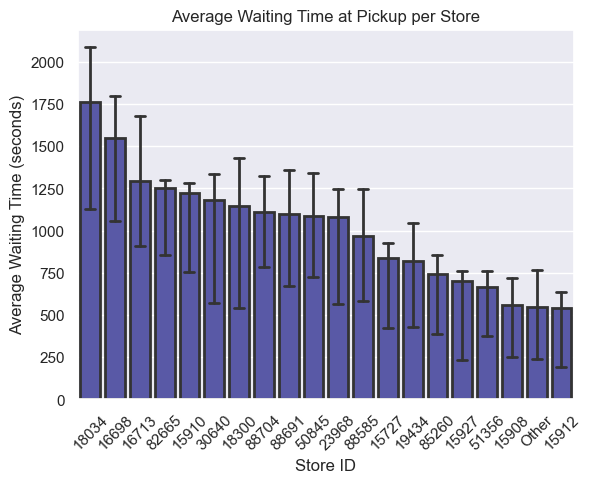

In [49]:
# Computes the mean waiting time in the quartile 3
mean_quartile_3 = df[df.waiting_time_at_pickup > quartile_3].waiting_time_seconds.mean()

# Gets store_address_id from the store with higher waiting time than the average waiting time in quartile 3
stores_to_keep = df[df.waiting_time_seconds > mean_quartile_3].store_address_id.unique()

# Group stores that don't feature in stores_to_keep
df["store_address_id_grouped_v2"] = df["store_address_id"].apply(
    lambda x: x if x in stores_to_keep else "Other"
)

# Orders the data for the plot
order = (
    df.groupby("store_address_id_grouped_v2")["waiting_time_seconds"]
    .mean()
    .sort_values(ascending=False)
)
order = pd.DataFrame(data=order)
order.reset_index(inplace=True)
order = order["store_address_id_grouped_v2"]

# Visualization
sns.barplot(
    x="store_address_id_grouped_v2",
    y="waiting_time_seconds",
    data=df,
    color="blue",
    estimator="mean",
    saturation=0.3,
    errorbar=("pi", 50),
    capsize=0.4,
    errcolor=".2",
    linewidth=2,
    errwidth=2,
    edgecolor=".2",
    order=order,
)
plt.title("Average Waiting Time at Pickup per Store")
plt.xlabel("Store ID")
plt.ylabel("Average Waiting Time (seconds)")
plt.xticks(rotation=45)
plt.show()

In [50]:
# Agregate the stores IDs from the plot above into a table where we will compute the number of orders
# associated with each store and the average waiting time weighted by the median waiting time of the dataset

stores_grouped = (
    df.groupby("store_address_id_grouped_v2")["waiting_time_seconds"]
    .mean()
    .sort_values(ascending=False)
    .to_frame()
    .reset_index()
)
stores_grouped_occurences = df.store_address_id_grouped_v2.value_counts().reset_index()
stores_grouped_occurences.rename(
    columns={
        "index": "store_address_id_grouped_v2",
        "store_address_id_grouped_v2": "number_of_orders",
    },
    inplace=True,
)
stores_grouped = stores_grouped.merge(
    stores_grouped_occurences, how="left", on="store_address_id_grouped_v2"
)
stores_grouped.set_index("store_address_id_grouped_v2", inplace=True)
stores_grouped["weighted_waiting_time"] = (
    stores_grouped.waiting_time_seconds * stores_grouped.number_of_orders
) / df.waiting_time_seconds.median()

# Converting the total seconds into HH:mm:ss format
stores_grouped["Hours"], remainder = divmod(
    stores_grouped["waiting_time_seconds"], 3600
)
stores_grouped["Minutes"], stores_grouped["Seconds"] = divmod(remainder, 60)

stores_grouped["waiting_time_at_pickup"] = (
    pd.to_timedelta(stores_grouped["Hours"], unit="h")
    + pd.to_timedelta(stores_grouped["Minutes"], unit="m")
    + pd.to_timedelta(stores_grouped["Seconds"], unit="s")
)
stores_grouped.drop(columns=["Hours", "Minutes", "Seconds"], inplace=True)

# Add is_food information
dummies = pd.get_dummies(df["is_food"], prefix="is_food", drop_first=True)
df = pd.concat([df, dummies], axis=1)  # One Hot encode is_food boolean feature
df.drop(columns="is_food", inplace=True)

# Get the average of orders that are food in each store
stores_grouped = stores_grouped.merge(
    df.groupby("store_address_id_grouped_v2")["is_food_True"]
    .mean()
    .sort_values(ascending=False)
    .to_frame(),
    how="left",
    on="store_address_id_grouped_v2",
)

# Add vertical information
aux_vertical = df[["store_address_id_grouped_v2", "vertical"]].drop_duplicates()
aux_vertical = aux_vertical[aux_vertical != "Other"]
stores_grouped = stores_grouped.merge(
    aux_vertical, how="left", on="store_address_id_grouped_v2"
)

stores_grouped.set_index("store_address_id_grouped_v2", inplace=True)

In [52]:
stores_grouped.sort_values("weighted_waiting_time", ascending=False)

,waiting_time_seconds,number_of_orders,weighted_waiting_time,waiting_time_at_pickup,is_food_True,vertical
store_address_id_grouped_v2,,,,,,
18300,1146.215768,977,1597.507568,0 days 00:19:06.215767635,1.000000,WALL - Partner
Other,546.892027,633,493.841160,0 days 00:09:06.892026578,0.876777,NaN
15727,837.187500,256,305.734665,0 days 00:13:57.187500,1.000000,WALL - Partner
30640,1183.328859,157,265.025151,0 days 00:19:43.328859060,1.000000,WALL - Partner
85260,740.105691,124,130.917412,0 days 00:12:20.105691057,1.000000,WALL - Partner
15910,1224.903846,52,90.863053,0 days 00:20:24.903846154,1.000000,WALL - Partner
15927,701.140845,71,71.014265,0 days 00:11:41.140845070,1.000000,WALL - Partner
50845,1085.205882,38,58.827138,0 days 00:18:05.205882353,1.000000,WALL - Partner
19434,821.638889,36,42.195435,0 days 00:13:41.638888889,1.000000,WALL - Partner


In [426]:
print(
    "Store ID that refers to the highest waiting time at pickup from the dataset: ",
    df[
        df.waiting_time_seconds == df.waiting_time_seconds.max()
    ].store_address_id.unique(),
)
print(
    "Highest waiting time at pickup observed: ",
    df[df.waiting_time_seconds == df.waiting_time_seconds.max()].waiting_time_at_pickup,
)

Store ID that refers to the highest waiting time at pickup from the dataset:  [18300]
Highest waiting time at pickup observed:  id
52683223   0 days 01:27:14
Name: waiting_time_at_pickup, dtype: timedelta64[ns]


By doing this grouping of store_address_id we observe that there is a clear worst offender in terms of stores that exist in the dataset. 

That worst offender being store **18300**

Store **18300** has the 7th highest average waiting time at pickup (19 minutes and 6 seconds), however it has the highest value for weighted waiting time at pickup due to having the highest amount of orders (977) amongst the population of stores analyzed in the plot and table above. Additionally, this store also possesses the highest waiting time at pickup for a single order in the entire dataset, with 1 hour, 27 minutes and 14 seconds that the courier had to wait after arriving at the store.

Other stores can also be considered as stores that should be monitored in the future:

i) Store **18034** - It has the highest value for average waiting time at pickup, even though it has only 3 orders (29 minutes and 21 seconds).

ii) Store **16698** - Second highest waiting time at pickup (25 minutes and 49 seconds) but with only 4 orders.

We can also observe that 17 out of 19 stores with the highest waiting time at pickup are restaurants/food selling places, which might indicate that a courier has to wait for the food to be cooked/served before he/she can pick it up.

Additionally, the stores with the highest waiting pickup time are not Partners of Glovo, which means that couriers must place an order like a regular customer when they arrive to the store, which will increase he/she waiting time.

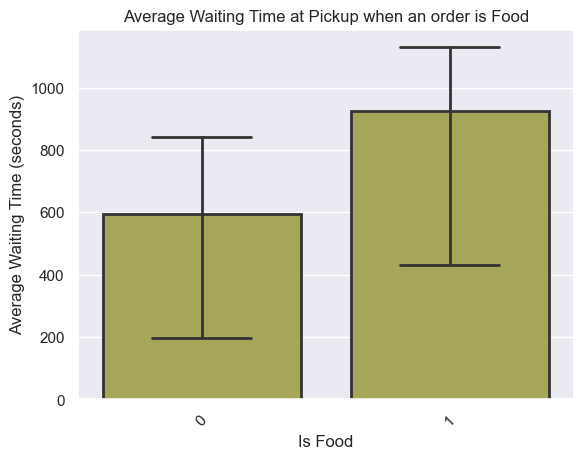

In [71]:
# Visualization
sns.barplot(
    x="is_food_True",
    y="waiting_time_seconds",
    data=df,
    color="yellow",
    estimator="mean",
    saturation=0.3,
    errorbar=("pi", 50),
    capsize=0.4,
    errcolor=".2",
    linewidth=2,
    errwidth=2,
    edgecolor=".2",
)
plt.title("Average Waiting Time at Pickup when an order is Food")
plt.xlabel("Is Food")
plt.ylabel("Average Waiting Time (seconds)")
plt.xticks(rotation=45)
plt.show()

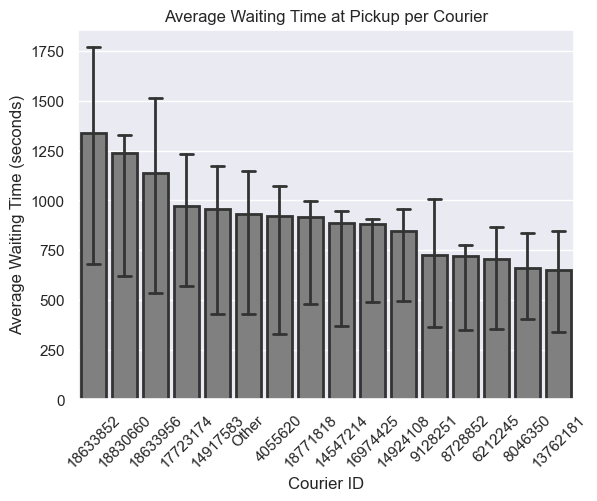

In [67]:
# Count the number of instances of each courier ID
courier_counts = df.courier_id.value_counts()

# Create a list of courier IDs that appear more than the mean of occurences
couriers_to_keep = courier_counts[courier_counts > 50].index

# Group couriers that don't feature in couriers_to_keep
df["courier_id_grouped"] = df["courier_id"].apply(
    lambda x: x if x in couriers_to_keep else "Other"
)

# Orders the data for the plot
order = (
    df.groupby("courier_id_grouped")["waiting_time_seconds"]
    .mean()
    .sort_values(ascending=False)
)
order = pd.DataFrame(data=order)
order.reset_index(inplace=True)
order = order["courier_id_grouped"]

# Visualization
sns.barplot(
    x="courier_id_grouped",
    y="waiting_time_seconds",
    data=df,
    color="grey",
    estimator="mean",
    saturation=0.3,
    errorbar=("pi", 50),
    capsize=0.4,
    errcolor=".2",
    linewidth=2,
    errwidth=2,
    edgecolor=".2",
    order=order,
)
plt.title("Average Waiting Time at Pickup per Courier")
plt.xlabel("Courier ID")
plt.ylabel("Average Waiting Time (seconds)")
plt.xticks(rotation=45)
plt.show()